In [1]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load data
url = "https://raw.githubusercontent.com/uras-alkaya/AI-Projects/refs/heads/main/teknasyon-case-ai-datascientist-3/datasets/churn_train.csv"
df = pd.read_csv(url)

In [3]:
# 2. Data Analysis
print("Dataset shape:", df.shape)
print("\nSample data:")
df.head()

Dataset shape: (60000, 66)

Sample data:


,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,202550,1835,0,1,9.66,2.26,1,1,...,45.35,0.0,26.62,0.00,390,10,115,10,0.0,0
1,2013,6,930164,536,0,10,54.92,0.60,1,1,...,24.98,0.0,23.90,0.00,52,0,52,0,0.0,0
2,2013,6,46907,1046,0,1,16.25,13.47,1,1,...,116.47,15.2,65.65,31.28,262,0,199,11,0.0,0
3,2013,8,1174456,15947,0,8,0.00,0.00,1,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.0,0
4,2013,6,300131,1630,0,1,6.14,3.76,1,1,...,30.38,0.0,8.00,0.00,61,0,60,0,0.0,0


In [4]:
print("\nData type information:")
df.info()


Data type information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        60000 non-null  int64  
 1   month                                       60000 non-null  int64  
 2   user_account_id                             60000 non-null  int64  
 3   user_lifetime                               60000 non-null  int64  
 4   user_intake                                 60000 non-null  int64  
 5   user_no_outgoing_activity_in_days           60000 non-null  int64  
 6   user_account_balance_last                   60000 non-null  float64
 7   user_spendings                              60000 non-null  float64
 8   user_has_outgoing_calls                     60000 non-null  int64  
 9   user_has_outgoing_sms                       60000 non-null 

In [5]:
print("\nMissing value check:")
df.isnull().sum()


Missing value check:


,0
year,0
month,0
user_account_id,0
user_lifetime,0
user_intake,0
...,...
last_100_sms_outgoing_to_onnet_count,0
last_100_sms_outgoing_to_offnet_count,0
last_100_sms_outgoing_to_abroad_count,0
last_100_gprs_usage,0


In [6]:
print("\nBasic statistics:")
df.describe().T


Basic statistics:


,count,mean,std,min,25%,50%,75%,max
year,60000.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.0,2013.00
month,60000.0,6.257100,0.662827,6.0,6.00,6.0,6.0,8.00
user_account_id,60000.0,595438.501883,429315.250236,13.0,251111.25,413509.5,1041391.0,1196944.00
user_lifetime,60000.0,4010.707750,6062.226966,0.0,456.00,1217.0,1985.0,15947.00
user_intake,60000.0,0.041083,0.198485,0.0,0.00,0.0,0.0,1.00
...,...,...,...,...,...,...,...,...
last_100_sms_outgoing_to_onnet_count,60000.0,7.273817,35.763351,0.0,0.00,0.0,1.0,2829.00
last_100_sms_outgoing_to_offnet_count,60000.0,62.447717,187.079702,0.0,0.00,5.0,51.0,13860.00
last_100_sms_outgoing_to_abroad_count,60000.0,3.049600,25.564016,0.0,0.00,0.0,0.0,4692.00
last_100_gprs_usage,60000.0,5.660140,71.594183,0.0,0.00,0.0,0.0,5571.22


In [7]:
print("\nCount records for each churn group:")
df.groupby("churn").size().reset_index(name="count")


Count records for each churn group:


,churn,count
0,0,47451
1,1,12549


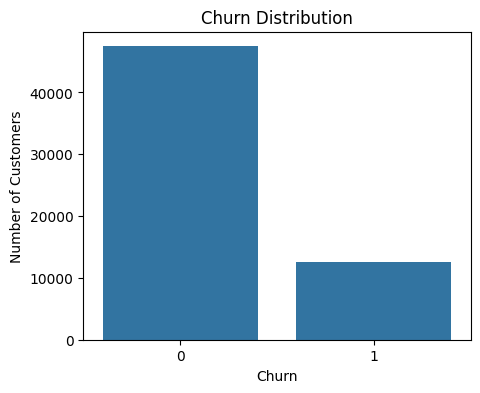

In [8]:
# 3. Visualization
# Target variable distribution
plt.figure(figsize=(5,4))
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

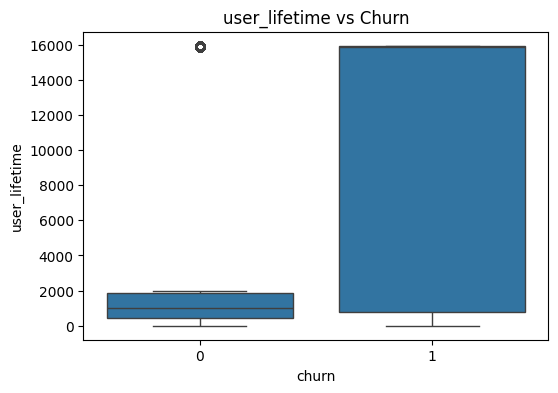

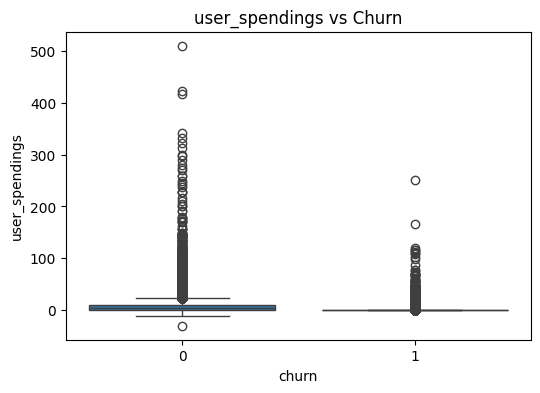

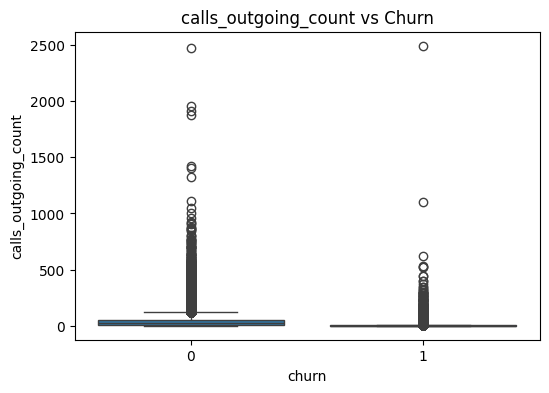

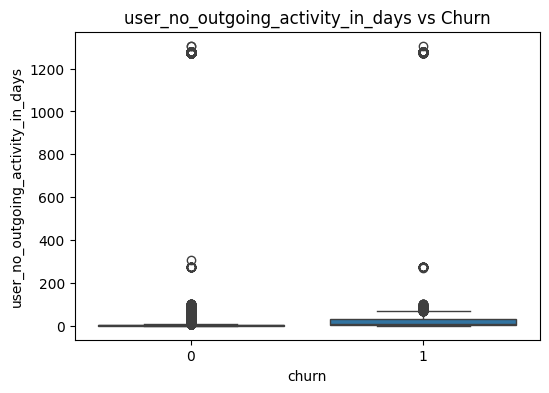

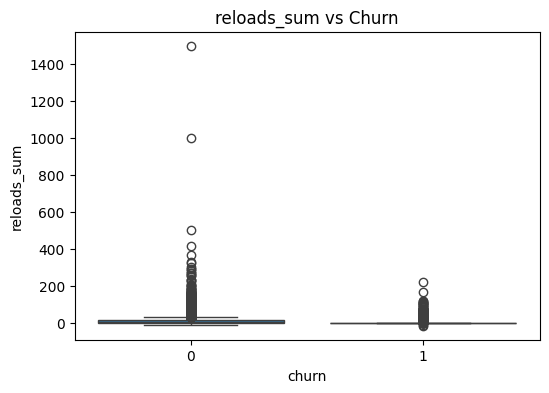

In [9]:
# Distribution of selected features by churn status
churn_analysis_features = ["user_lifetime", "user_spendings", "calls_outgoing_count", "user_no_outgoing_activity_in_days", "reloads_sum"]

for col in churn_analysis_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

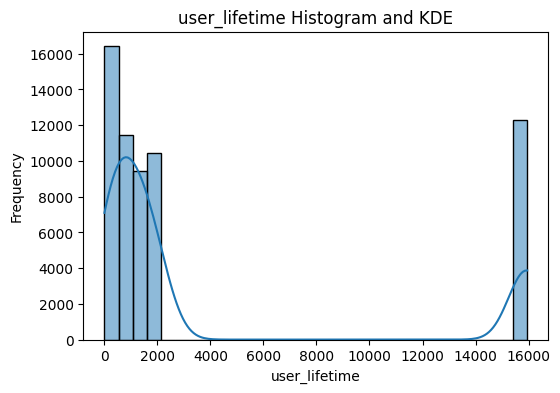

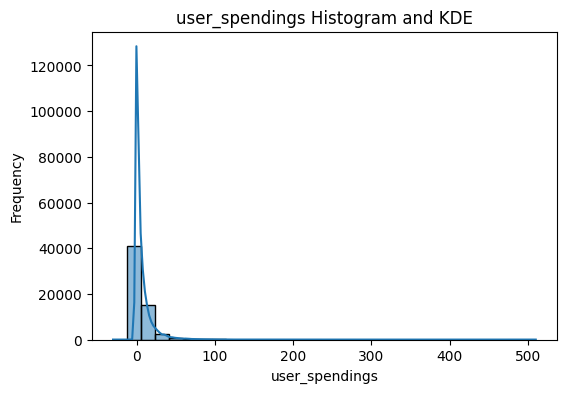

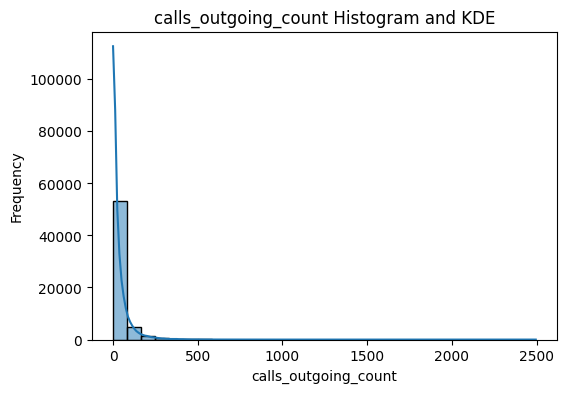

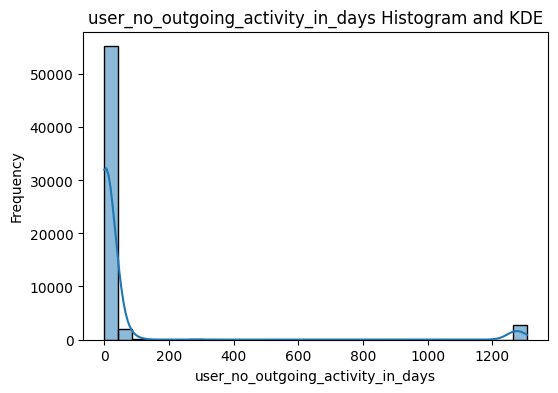

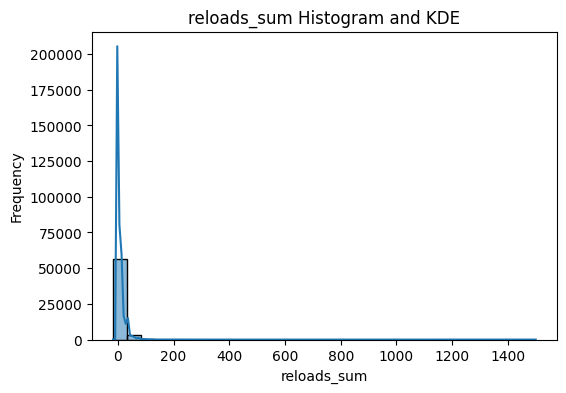

In [10]:
# Histogram + KDE
for col in churn_analysis_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Histogram and KDE")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

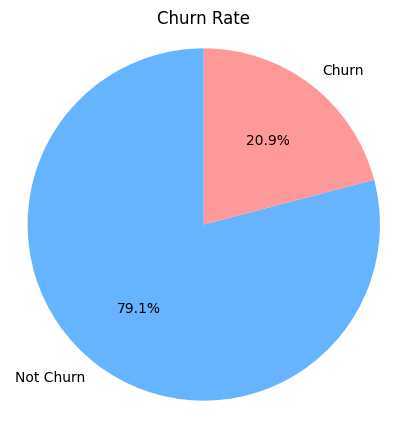


Overall churn rate: 20.91%


In [11]:
# Churn rate (percentage)
churn_counts = df["churn"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    churn_counts,
    labels=["Not Churn", "Churn"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff9999"]
)
plt.title("Churn Rate")
plt.axis("equal")
plt.show()

churn_rate = df["churn"].mean()
print(f"\nOverall churn rate: {churn_rate:.2%}")


Average values by churn status (Selected Features):
churn                                        0             1
user_lifetime                      2359.832606  10253.091720
user_spendings                        8.297969      1.244514
calls_outgoing_count                 42.837137      7.023747
user_no_outgoing_activity_in_days    33.857242    178.168858
reloads_sum                           9.418756      1.530191


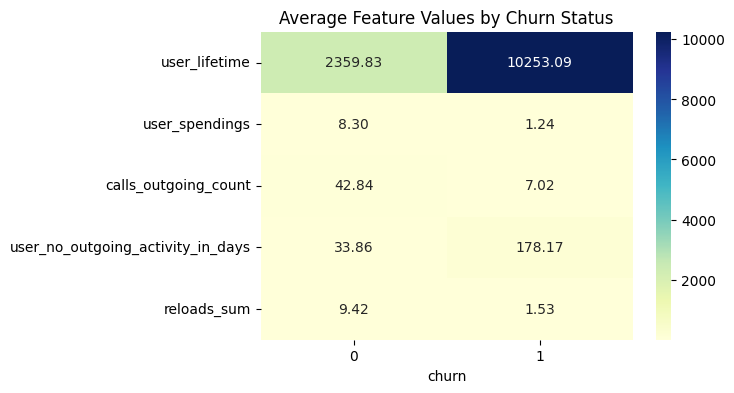

In [12]:
# Average feature by churn status
churn_means = df.groupby("churn")[churn_analysis_features].mean().T
print("\nAverage values by churn status (Selected Features):")
print(churn_means)

# Average feature heatmap by churn status
plt.figure(figsize=(6,4))
sns.heatmap(churn_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Feature Values by Churn Status")
plt.show()

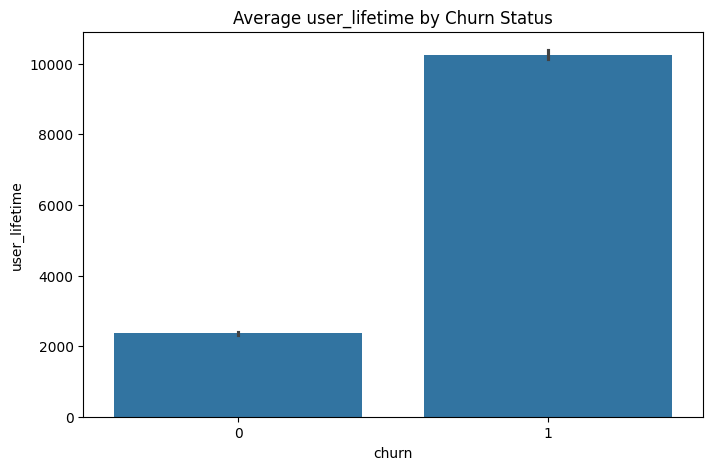

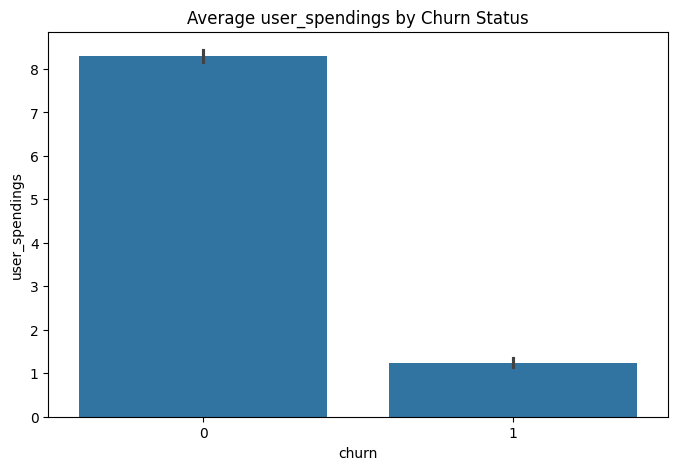

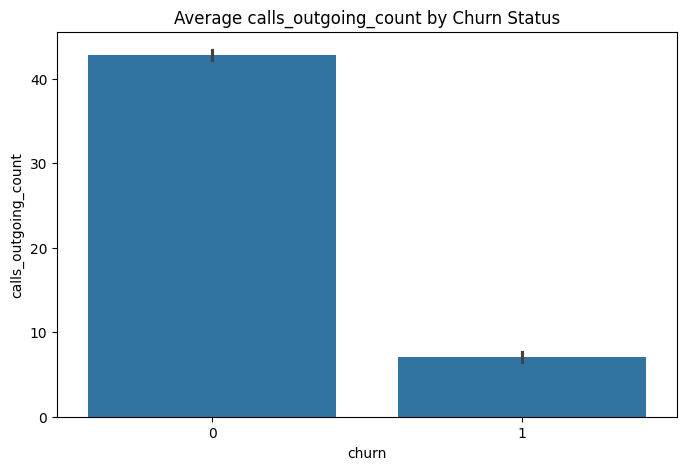

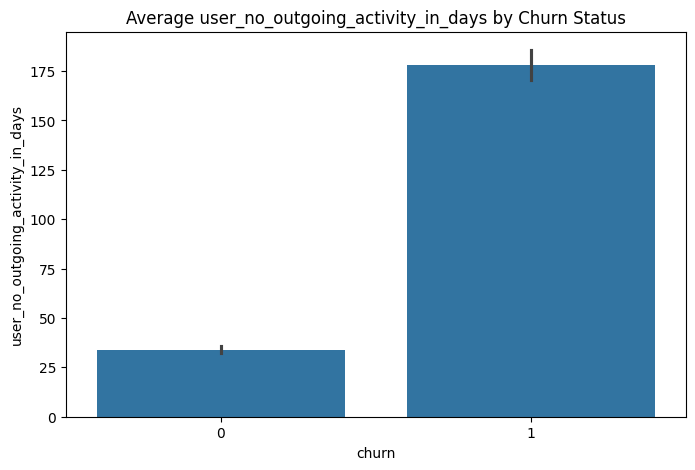

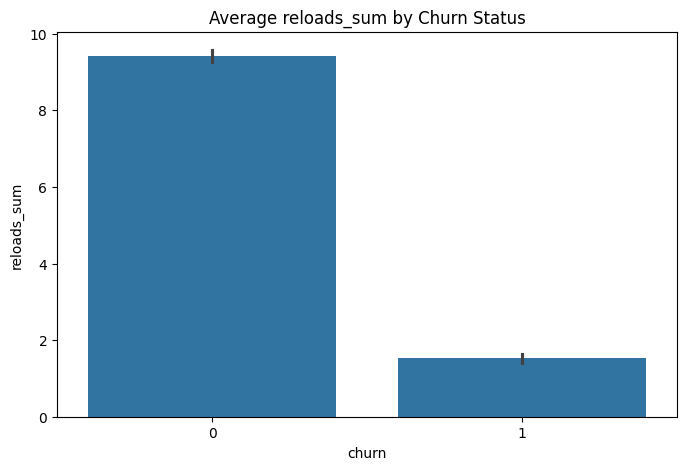

In [13]:
# Average features barplot by churn status
for col in churn_analysis_features:
    plt.figure(figsize=(8,5))
    sns.barplot(x="churn", y=col, data=df)
    plt.title(f"Average {col} by Churn Status")
    plt.show()

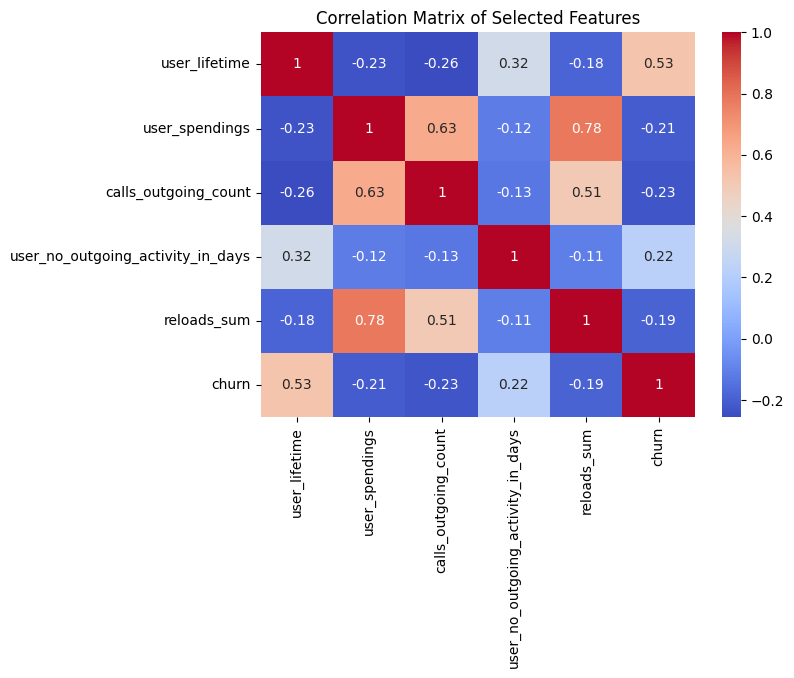

In [14]:
# Correlation matrix
selected_cols = ["user_lifetime", "user_spendings", "calls_outgoing_count", "user_no_outgoing_activity_in_days", "reloads_sum", "churn"]

plt.figure(figsize=(7,5))
corr_matrix = df[selected_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [15]:
# Find features most correlated with churn
corr_with_churn = corr_matrix["churn"].sort_values(ascending=False)
print("Features with Highest Correlation to Churn:\n", corr_with_churn)

Features with Highest Correlation to Churn:
 churn                                1.000000
user_lifetime                        0.529546
user_no_outgoing_activity_in_days    0.222182
reloads_sum                         -0.191153
user_spendings                      -0.210557
calls_outgoing_count                -0.228963
Name: churn, dtype: float64


Text(0.5, 1.02, 'Pairplot of Selected Features')

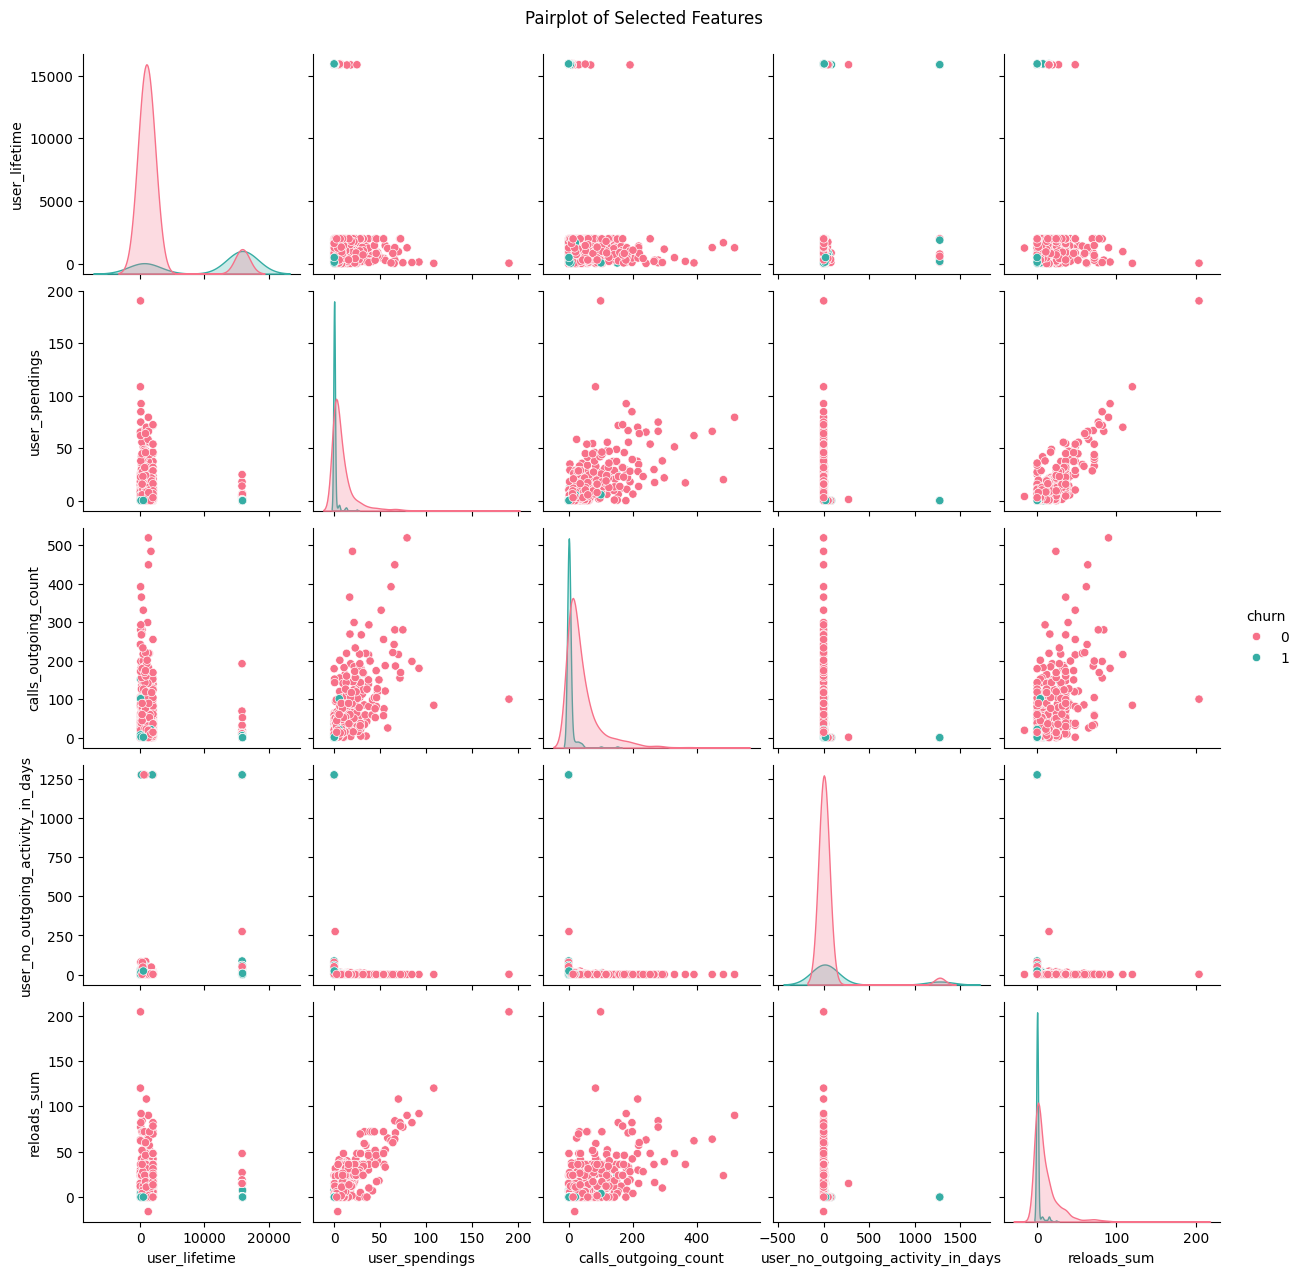

In [16]:
# Pairplot (selected features)
sns.pairplot(df[selected_cols].sample(1000, random_state=42), hue="churn", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)

                                     Min       Max
user_lifetime                       0.00  15947.00
user_spendings                    -30.06    510.11
calls_outgoing_count                0.00   2495.00
user_no_outgoing_activity_in_days   0.00   1307.00
reloads_sum                       -17.24   1500.00


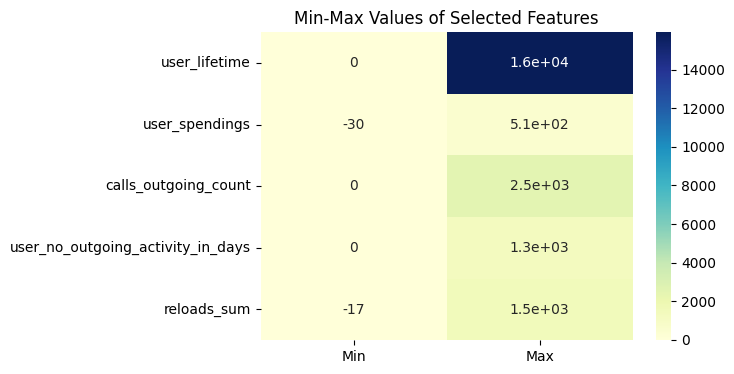

In [17]:
# Create Min-Max table
min_max_df = pd.DataFrame({
    "Min": df[churn_analysis_features].min(),
    "Max": df[churn_analysis_features].max()
})
print(min_max_df)

# Min-Max Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(min_max_df, annot=True, cmap="YlGnBu")
plt.title("Min-Max Values of Selected Features")
plt.show()

In [18]:
print("\n--- Aykırı Değer Analizi (IQR Yöntemi) ---\n")

for col in churn_analysis_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"{col}:")
    print(f"  Q1 = {Q1:.2f}")
    print(f"  Q3 = {Q3:.2f}")
    print(f"  IQR = {IQR:.2f}")
    print(f"  Lower Bound = {lower_bound:.2f}")
    print(f"  Upper Bound = {upper_bound:.2f}")
    print(f"  Aykırı değer sayısı = {num_outliers}\n")


--- Aykırı Değer Analizi (IQR Yöntemi) ---

user_lifetime:
  Q1 = 456.00
  Q3 = 1985.00
  IQR = 1529.00
  Lower Bound = -1837.50
  Upper Bound = 4278.50
  Aykırı değer sayısı = 12258

user_spendings:
  Q1 = 0.00
  Q3 = 8.09
  IQR = 8.09
  Lower Bound = -12.13
  Upper Bound = 20.23
  Aykırı değer sayısı = 5129

calls_outgoing_count:
  Q1 = 2.00
  Q3 = 43.00
  IQR = 41.00
  Lower Bound = -59.50
  Upper Bound = 104.50
  Aykırı değer sayısı = 4829

user_no_outgoing_activity_in_days:
  Q1 = 1.00
  Q3 = 8.00
  IQR = 7.00
  Lower Bound = -9.50
  Upper Bound = 18.50
  Aykırı değer sayısı = 7407

reloads_sum:
  Q1 = 0.00
  Q3 = 12.00
  IQR = 12.00
  Lower Bound = -18.00
  Upper Bound = 30.00
  Aykırı değer sayısı = 3915

